# **Fashion MNIST Classification with CNN**
This notebook builds and trains a **Convolutional Neural Network (CNN)** to classify objects in the **Fashion MNIST dataset**.

## **1. Importing Necessary Libraries**
We start by importing TensorFlow, Matplotlib, and NumPy for data handling and visualization.

In [1]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
    

## **2. Loading and Preparing the Dataset**
We load the **Fashion MNIST** dataset and normalize pixel values to the range **[0,1]** to improve training convergence. We also reshape the images for compatibility with CNN input.

In [2]:

# Load the dataset
fmnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

# Normalize pixel values to range [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Expand dimensions for CNN input format
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Print shape to verify
print(f"Training Data Shape: {X_train.shape}, Training Labels: {y_train.shape}")
print(f"Test Data Shape: {X_test.shape}, Test Labels: {y_test.shape}")
    

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training Data Shape: (60000, 28, 28, 1), Training Labels: (60000,)
Test Data Shape: (10000, 28, 28, 1), Test Labels: (10000,)


## **3. Visualizing the Dataset**
Let's display some sample images along with their corresponding class labels.

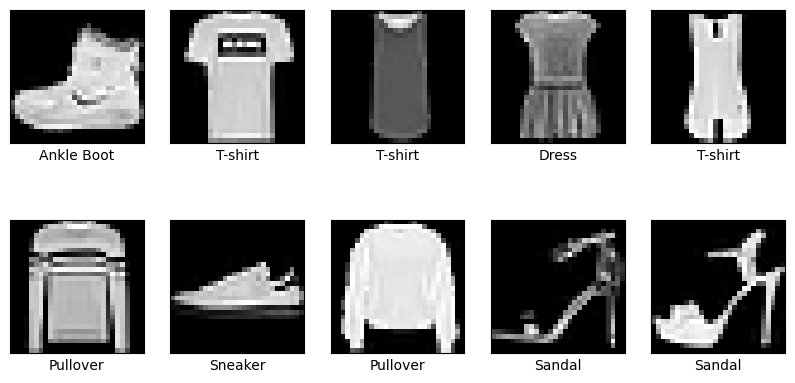

In [3]:

class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()
    

## **4. Building the CNN Model**
We construct a **Convolutional Neural Network** with two **Conv2D layers**, max pooling, dropout, and fully connected layers for classification.

In [4]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print model summary
model.summary()
    

C:\Users\Ant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

## **5. Compiling the Model**
We use the **Adam optimizer** with a **learning rate of 0.001** and the **Sparse Categorical Crossentropy** loss function.

In [5]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    

## **6. Training the Model**
The model is trained for **15 epochs** with a batch size of **64**.

In [6]:

history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))
    

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7315 - loss: 0.7480 - val_accuracy: 0.8738 - val_loss: 0.3434
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8695 - loss: 0.3637 - val_accuracy: 0.8904 - val_loss: 0.2937
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8915 - loss: 0.3041 - val_accuracy: 0.8977 - val_loss: 0.2769
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9019 - loss: 0.2722 - val_accuracy: 0.9065 - val_loss: 0.2549
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9106 - loss: 0.2440 - val_accuracy: 0.9063 - val_loss: 0.2600
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9167 - loss: 0.2280 - val_accuracy: 0.9088 - val_loss: 0.2463
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9241 - loss: 0.2088 - val_accuracy: 0.9164 - val_loss: 0.2338
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9293 - loss: 0.1940 - 

## **7. Evaluating the Model**
We evaluate the model on the test dataset to check its generalization performance.

In [7]:

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")
    

313/313 - 1s - 3ms/step - accuracy: 0.9251 - loss: 0.2514

Test Accuracy: 0.9251


## **8. Visualizing Training Progress**
Let's plot the training and validation accuracy over epochs to analyze the learning curve.

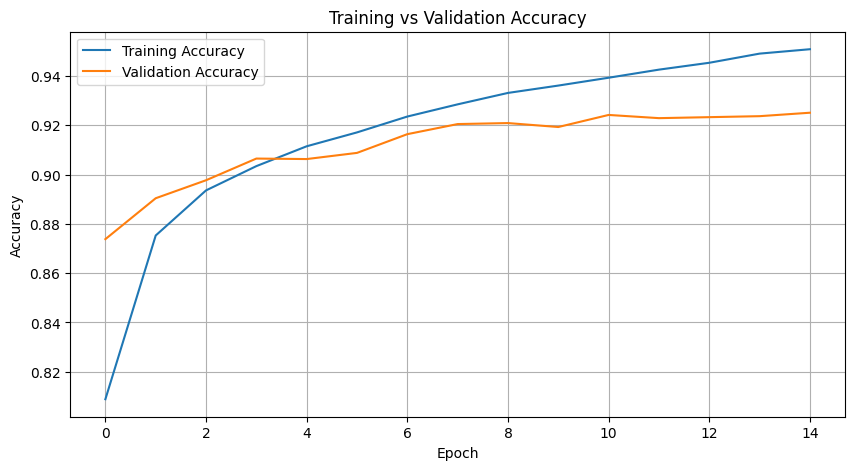

In [8]:

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training vs Validation Accuracy')
plt.show()
    

## **9. Making Predictions**
We make predictions on the test set and visualize some sample results.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


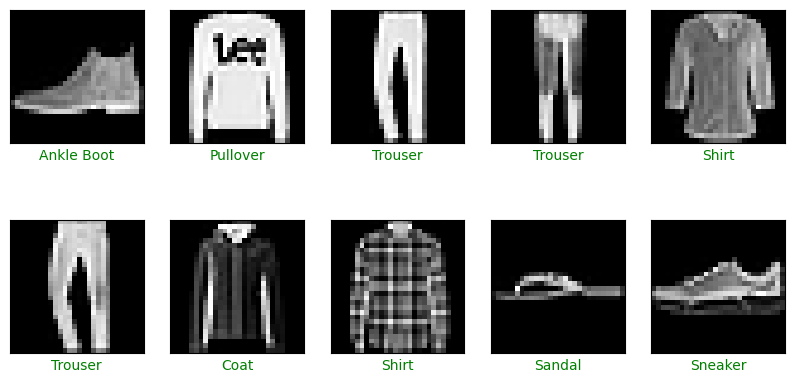

In [9]:

predictions = model.predict(X_test)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    actual_label = y_test[i]
    color = 'green' if predicted_label == actual_label else 'red'
    plt.xlabel(class_names[predicted_label], color=color)
plt.show()
    